In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
from logger import log
from corpgame import PolymatrixGame
from corpgame import GameManager
import random
import networkx as nx

## Effect of parameter $\alpha$ on amount of PNE
### y => #PNE
### x => $\alpha$
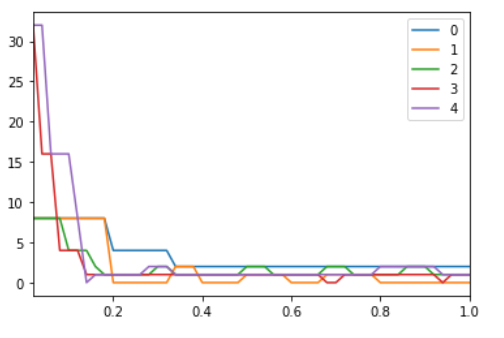

Notation from Cai et al 2016

G: A finite set $V = \{ 1, 2, ..., n\}$ of players (nodes), and a finite set $E$ of interactions (edges) which are taken to be unordered pairs $[i,j]$ with $i \neq j$

G: For each player $i \in V$, a finite set of strategies $S_i$ with no requirement on size other than $|S_i| \leq 1$.
S: In our case, a natural number $k$ of the amount of strategies available fore every player such that $\forall_i |S_i|=k$ and furthermore all players have equivalent strategy sets to choose from such that $\forall_{[i,j]} S_i = S_j$.

G: For each interaction $[i,j] \in E$, a two-person game $(p^{ij},p^{ji})$ with payoff $p^{ij}:S_i x S_j \longmapsto R $.
S: Two-person game payoffs are always zero-sum such that $p^{ij}=-p^{ji}$.

G: For each player $i \in V$ and strategy profile $\bar{s} = \{ s_1, ..., s_n\}$, payoff of player $i$ is $p_i(\bar{s}) = \sum _{[i,j] \in E} p^{ij}(s_i,s_j)$.
S: In our case, if $s_i=s_j$ then $p^{ij}=p^{ji}=0$ 

In [2]:
games = [
    [[4,4],[2,6],[10,0]],
    [[6,4],[2,6],[10,10]],
    [[11,2],[14,7],[20,12]],
    [[20,60],[100,0],[30,30],[17,13],[10,53]],
    [[7, 26], [30, 75], [12, 38], [15, 21],[8,0]],
]

In [4]:
# trying out some configurations
n=100
for i in range(n):
    game_settings = {
            "start_populations_matrix": [[11,2],[14,7],[20,12]],
            "topology": "fully_connected",
            'alpha': (i+1)/n,
            'log_level': "error",
            'player_labels': [1,2,3]
        }
    game = PolymatrixGame(**game_settings)
    game.solve()
    #pprint(game.payoffs)
    pprint(len(game.pne))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [5]:
populations = [[[11,2],[14,7],[20,12]],
               [[11,2],[14,7],[20,12]],
               [[2,6],[10,0],[3,3],[1,1]],
               [[2,6],[3,7],[3,3]],
               [[20,60],[100,0],[30,30],[17,13],[10,53]]]
n=50
X = [(x+1)/n for x in list(range(n))]
results = {i:[] for i in range(len(populations))}
for i, population in enumerate(populations):
    for x in X:
        game_settings = {
                "start_populations_matrix": population,
                "topology": "fully_connected",
                'alpha': x,
                'log_level': "error",
                'player_labels': list(range(len(population)))
            }
        game = PolymatrixGame(**game_settings)
        game.solve()
        results[i].append(len(game.pne))
    print(i)



0
1
2
3
4


In [17]:
populations = [[[2,6],[10,0],[3,3],[1,1]]]
n=50
X = [(x+1)/n for x in list(range(n))]
results = {i:[] for i in range(len(populations))}
results2 = {i:[] for i in range(len(populations))}
for i, population in enumerate(populations):
    for x in X:
        game_settings = {
                "start_populations_matrix": population,
                "topology": "fully_connected",
                'alpha': x,
                'log_level': "error",
                'player_labels': list(range(len(population)))
            }
        game = PolymatrixGame(**game_settings)
        game.solve()
        results[i].append(len(game.pne))
        results2[i].append(game.pne)
    print(i)



0


In [18]:
results2

{0: [{},
  {},
  {},
  {},
  {},
  {},
  {'1001': [-0.04666666666666666, 0.14, -0.14, 0.046666666666666676]},
  {},
  {},
  {},
  {'1001': [-0.07333333333333333, 0.22, -0.22, 0.07333333333333333]},
  {},
  {'1001': [-0.08666666666666667, 0.26, -0.26, 0.08666666666666667]},
  {'1001': [-0.09333333333333332, 0.28, -0.28, 0.09333333333333335]},
  {'1001': [-0.09999999999999998, 0.3, -0.3, 0.1]},
  {},
  {'1001': [-0.11333333333333334, 0.34, -0.34, 0.11333333333333334]},
  {},
  {},
  {},
  {},
  {'1001': [-0.14666666666666667, 0.44, -0.44, 0.14666666666666667]},
  {},
  {},
  {'1001': [-0.16666666666666663, 0.5, -0.5, 0.16666666666666669]},
  {'1001': [-0.17333333333333334, 0.52, -0.52, 0.17333333333333334]},
  {},
  {'1001': [-0.18666666666666665, 0.56, -0.56, 0.1866666666666667]},
  {},
  {'1001': [-0.19999999999999996, 0.6, -0.6, 0.2]},
  {'1001': [-0.20666666666666667, 0.62, -0.62, 0.20666666666666667]},
  {},
  {'1001': [-0.21999999999999997, 0.66, -0.66, 0.22000000000000003]},
  {'1

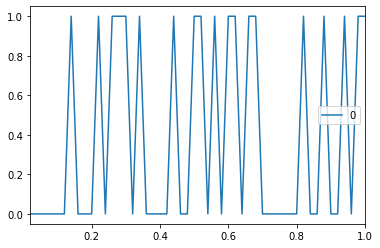

In [10]:
df = pd.DataFrame(results, index=X)

pd.DataFrame(df).plot.line()

Text(0, 0.5, 'Amount of PNE')

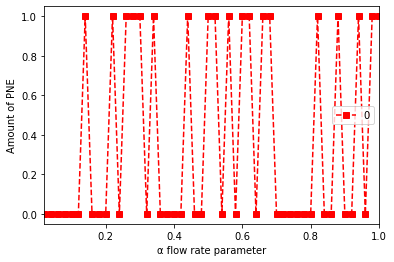

In [15]:
import pandas as pd
style = ['rs--','bo-','y^-']
ax = df.plot.line(style=style)
#ax.hlines(1.0,0.0,0.0035, linestyles='dashed')
#ax.annotate('null model', (0.0015, 1.62))
ax.set_xlabel('α flow rate parameter')
ax.set_ylabel('Amount of PNE')

In [7]:
# trying out some configurations
for beta in range(12):
    game_settings = {
            "start_populations_matrix": [[beta,4],[2,6],[10,0],[3,3]],
            "topology": "fully_connected",
            'alpha': 1.0,
            'log_level': "error"
        }
    game = PolymatrixGame(**game_settings)
    game.solve()
    print(beta, game.pne)

TypeError: 'NoneType' object is not iterable

In [24]:
# trying out some configurations
game_settings = {
        "start_populations_matrix": [[0,0],[4,4],[8,8],[3,3]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
pprint(game.actions)

{'0000': {'payoff': [0.0, 0.0, 0.0, 0.0],
          'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
          'pure_nash': False},
 '0001': {'payoff': [1.0, 0.0, -1.0, 0.0],
          'payoff_matrix': [[1.0, 0.0], [1.0, -1.0], [1.0, -2.0], [-3.0, 3.0]],
          'pure_nash': False},
 '0010': {'payoff': [2.0, 1.0, -4.0, 1.0],
          'payoff_matrix': [[2.0, 0.0], [2.0, -1.0], [-6.0, 2.0], [2.0, -1.0]],
          'pure_nash': False},
 '0011': {'payoff': [3.0, 1.0, -3.0, -1.0],
          'payoff_matrix': [[3.0, 0.0], [3.0, -2.0], [-4.0, 1.0], [-2.0, 1.0]],
          'pure_nash': False},
 '0100': {'payoff': [1.0, 0.0, -1.0, 0.0],
          'payoff_matrix': [[1.0, 0.0], [-3.0, 3.0], [1.0, -2.0], [1.0, -1.0]],
          'pure_nash': False},
 '0101': {'payoff': [2.0, 0.0, -2.0, 0.0],
          'payoff_matrix': [[2.0, 0.0], [-2.0, 2.0], [2.0, -4.0], [-2.0, 2.0]],
          'pure_nash': True},
 '0110': {'payoff': [3.0, -1.0, -3.0, 1.0],
          'payoff_matrix': [[3.0, 0.

In [15]:
# trying out some configurations
game_settings = {
        "start_populations_matrix": [[0,0],[4,4],[8,8],[12,12],[16,16]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
n=5
mst_size = int(n*(n-1)/2)-n+1
game = PolymatrixGame(**game_settings)
for beta in range(mst_size):   
    game.solve()
    print(beta, game.pne)
    game.network.remove_random_edge()

0 {}
1 {}
2 {}
3 {}
4 {}
5 {}


In [17]:
# trying out some configurations
manager = GameManager(3)
game_settings = {
        "start_populations_matrix": manager.get_random_players(0,10),
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
pprint(game.state)
game.solve()
#game.network.remove_random_edge()
game.print_nash()
pprint(game.payoffs)
game.nash_counter
game.nash

array([[4, 5],
       [5, 1],
       [7, 0]])
000
{'payoff': [0.0, 0.0, 0.0],
 'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
 'pure_nash': True}
{'000': [0.0, 0.0, 0.0],
 '001': [1.0, 3.0, -4.0],
 '010': [0.0, -2.0, 2.0],
 '011': [1.0, 0.0, -1.0],
 '100': [-4.0, 2.0, 2.0],
 '101': [-2.0, 5.0, -3.0],
 '110': [-2.0, -2.0, 4.0],
 '111': [0.0, 0.0, 0.0]}


{'000': True,
 '001': False,
 '010': False,
 '011': False,
 '100': False,
 '101': False,
 '110': False,
 '111': False}

In [ ]:
# Standalone state-space plot
graph = game.network.graph
print(game.network.graph.edges())
game.solve
game.print_nash()
game.state
payoff_matrix = [[0.0, 0.0],
                   [0.0, 0.0],
                   [7.0, -3.0],
                   [-14.0, 7.0],
                   [7.0, -4.0],
                   [0.0, 0.0]]
nx.draw(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph), labels={i:f"{i}\n{game.state[i, :]}\n{payoff_matrix[i]}" for i in range(6)})
nx.draw_networkx_nodes(graph, pos=nx.circular_layout(graph), node_color=['red','red','blue','red','blue','red'])

In [10]:
# Standalone game plot
graph = game.network.graph
print(game.network.graph.edges())
game.solve
game.print_nash()
game.state
payoff_matrix = [[0.0, 0.0],
                   [0.0, 0.0],
                   [7.0, -3.0],
                   [-14.0, 7.0],
                   [7.0, -4.0],
                   [0.0, 0.0]]
nx.draw(graph, pos=nx.circular_layout(graph))
nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph), labels={i:f"{i}\n{game.state[i, :]}\n{payoff_matrix[i]}" for i in range(6)})
nx.draw_networkx_nodes(graph, pos=nx.circular_layout(graph), node_color=['red','red','blue','red','blue','red'])

[(0, 1), (0, 2), (1, 2)]
110
{'payoff': [0.0, 0.0, 0.0],
 'payoff_matrix': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
 'pure_nash': True}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


IndexError: index 3 is out of bounds for axis 0 with size 3